In [ ]:
# Install in a notebook cell if not installed
!pip install geopandas folium contextily pandas matplotlib shapely

# Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
import contextily as ctx

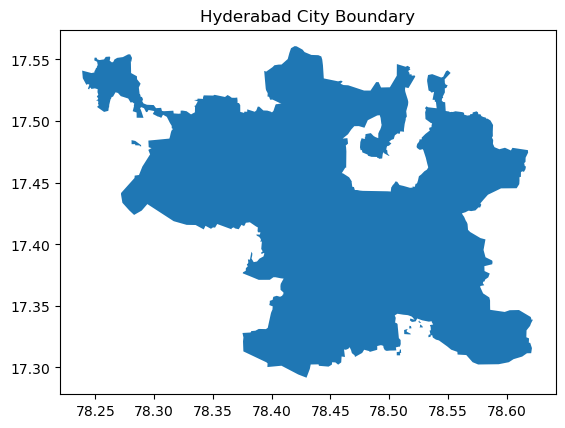

In [3]:
# Option 1: Read from a GeoJSON file if you have it
# hyd = gpd.read_file('data/hyderabad_boundary.geojson')

# Option 2: Download Hyderabad boundary using Geopandas built-in features
import osmnx as ox
hyderabad = ox.geocode_to_gdf("Hyderabad, India")
hyderabad.plot()
plt.title("Hyderabad City Boundary")
plt.show()

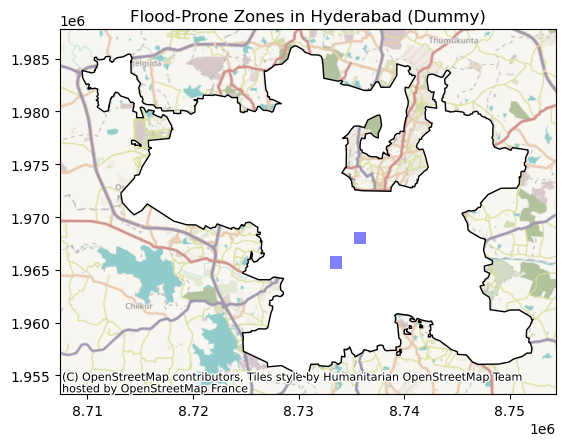

In [13]:
from shapely.geometry import Polygon

# Create dummy polygons for flood zones
flood_areas = gpd.GeoDataFrame({
    'zone': ['Flood Zone 1', 'Flood Zone 2'],
    'geometry': [
        Polygon([(78.45,17.38), (78.46,17.38), (78.46,17.39), (78.45,17.39)]),
        Polygon([(78.47,17.40), (78.48,17.40), (78.48,17.41), (78.47,17.41)])
    ]
}, crs='EPSG:4326')

# Plot with Hyderabad
ax = hyderabad.to_crs(epsg=3857).plot(color='white', edgecolor='black')
flood_areas.to_crs(epsg=3857).plot(ax=ax, color='blue', alpha=0.5)
ctx.add_basemap(ax)
plt.title("Flood-Prone Zones in Hyderabad (Dummy)")
plt.show()

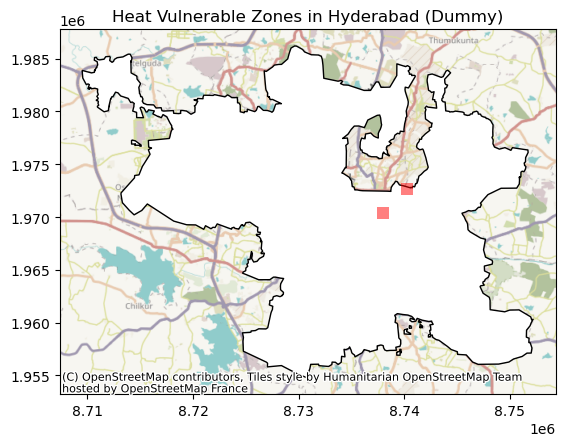

In [15]:
heat_areas = gpd.GeoDataFrame({
    'zone': ['Heat Zone 1', 'Heat Zone 2'],
    'geometry': [
        Polygon([(78.49,17.42), (78.50,17.42), (78.50,17.43), (78.49,17.43)]),
        Polygon([(78.51,17.44), (78.52,17.44), (78.52,17.45), (78.51,17.45)])
    ]
}, crs='EPSG:4326')

# Plot heat areas
ax = hyderabad.to_crs(epsg=3857).plot(color='white', edgecolor='black')
heat_areas.to_crs(epsg=3857).plot(ax=ax, color='red', alpha=0.5)
ctx.add_basemap(ax)
plt.title("Heat Vulnerable Zones in Hyderabad (Dummy)")
plt.show()

In [17]:
# Convert everything to lat-long
hyd_latlon = hyderabad.to_crs(epsg=4326)
flood_latlon = flood_areas.to_crs(epsg=4326)
heat_latlon = heat_areas.to_crs(epsg=4326)

# Center the map
center = [17.4, 78.48]
m = folium.Map(location=center, zoom_start=12)

# Add flood zones
for _, row in flood_latlon.iterrows():
    folium.GeoJson(row['geometry'], 
                   style_function=lambda x: {'fillColor': 'blue', 'color': 'blue', 'weight': 1, 'fillOpacity': 0.5},
                   tooltip=row['zone']).add_to(m)

# Add heat zones
for _, row in heat_latlon.iterrows():
    folium.GeoJson(row['geometry'], 
                   style_function=lambda x: {'fillColor': 'red', 'color': 'red', 'weight': 1, 'fillOpacity': 0.5},
                   tooltip=row['zone']).add_to(m)

m